## Notebook Purpose

Evaluate output of original fastmri (pytorch=1.5) vs new fastmri (pytorch=1.7) to see if output is the same


# CURRENT STATUS

- running over a range of different scaling factors
    - simultaneously doing this with original fastmri and new fastmri
- does changing the scaling factor mitigates artifacts in some cases?
    - preliminary yes
- is one scaling factor universally better? or does it depend on image characteristics?
    - preliminary no, yes
- which scaling factors perform well on different characteristics of images?
- do these same results hold for the old repo?

In [22]:
import os, sys
from os import listdir
from os.path import isfile, join
import numpy as np
import torch
from matplotlib import pyplot as plt

sys.path.append('/home/vanveen/ConvDecoder/')
from utils.evaluate import calc_metrics, normalize_img

In [71]:
def plot_list(arr_list):
    
    NUM_COLS = len(arr_list)
    title_list = ['ground-truth', 'old', 'new', 'x']
    
    fig = plt.figure(figsize=(20,20))
    
    for idx in range(NUM_COLS):
        ax = fig.add_subplot(1,NUM_COLS,idx+1)
        ax.imshow(arr_list[idx], cmap='gray')
        ax.set_title(title_list[idx], fontsize=20)
        ax.axis('off')
    plt.show()

In [63]:
path_o = '/bmrNAS/people/dvv/out_fastmri/old_pytorch1.5/'
path_n = '/bmrNAS/people/dvv/out_fastmri/new_pytorch1.7/norm_ortho/'

def get_files(path):
    files = [f for f in listdir(path) if isfile(join(path, f))]
    files.sort()
    return files

files_o = [f for f in get_files(path_o) if 'iter10000_alpha0.npy' in f]
files_n_dc = [f for f in get_files(path_n) if '_dc.npy' in f]

In [64]:
files_n_dc

['1000007_dc.npy',
 '1000273_dc.npy',
 '1000325_dc.npy',
 '1000464_dc.npy',
 '1000537_dc.npy',
 '1000818_dc.npy',
 '1001140_dc.npy',
 '1001219_dc.npy',
 '1001338_dc.npy',
 '1001533_dc.npy',
 '1001598_dc.npy',
 '1001798_dc.npy']

In [78]:
vid_key = '1000007'
vid_key = '1000464'

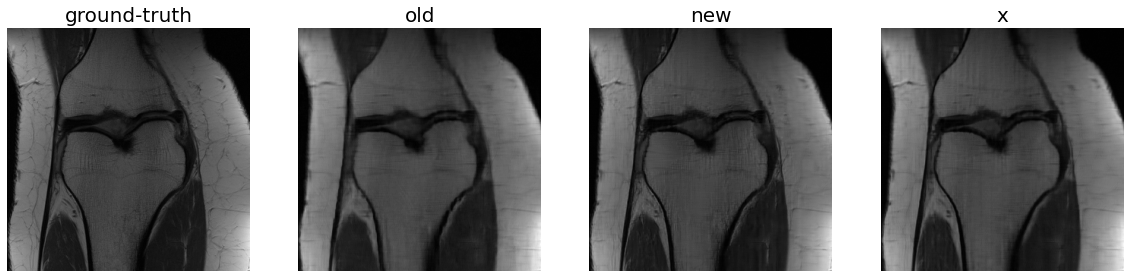

(0.7220112873131161, None, 0.8550107647124398, 33.36851266138021)
(0.8219204686088788, None, 0.8834538872142929, 35.66263392075007)
(0.802638382313297, None, 0.88117937631323, 35.2895196012119)


In [79]:
path_n_ca = '/bmrNAS/people/dvv/out_fastmri/new_pytorch1.7/not_halved/'
path_n_no = path_n

# vid_key = '1000007'
arr_o = np.load('{}{}_iter10000_alpha0.npy'.format(path_o, vid_key))
arr_gt = np.load('{}{}_gt.npy'.format(path_n_ca, vid_key))
arr_n_ca = np.load('{}{}_dc.npy'.format(path_n_ca, vid_key))
arr_n_no = np.load('{}{}_dc.npy'.format(path_n_no, vid_key))

plot_list([arr_gt, arr_o, arr_n_ca, arr_n_no])

print(calc_metrics(arr_gt, arr_o))
print(calc_metrics(arr_gt, arr_n_ca))
print(calc_metrics(arr_gt, arr_n_no))

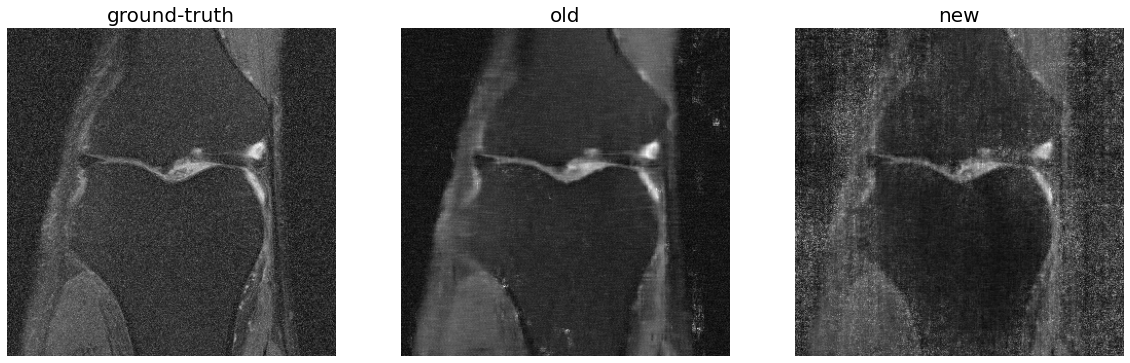

1000007
0.40511978922564235 23.931084358771194
0.24372434100563353 19.6352756897926


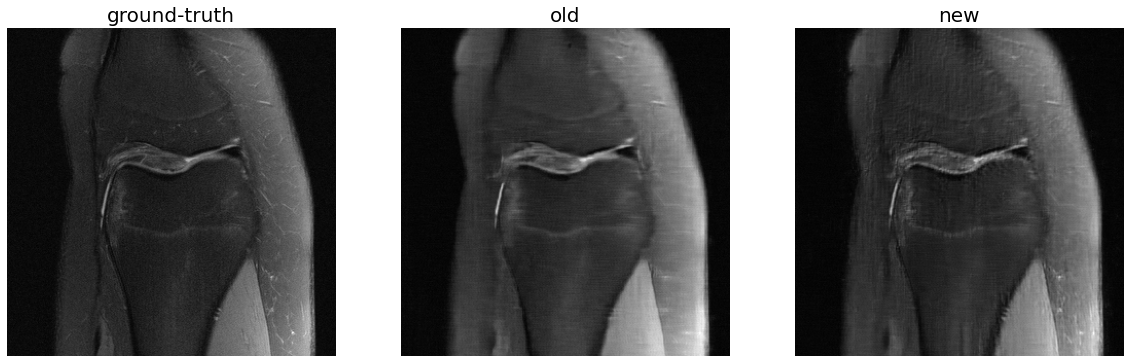

1000273
0.7516028564659959 30.837173954257665
0.7603502066727859 31.526079050724384


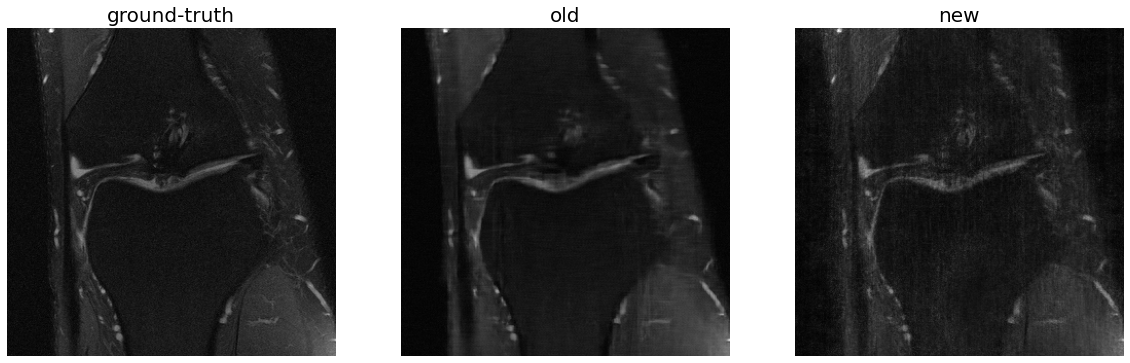

1000325
0.7638936926923392 32.14250682497399
0.6582776857846315 30.27927497164029


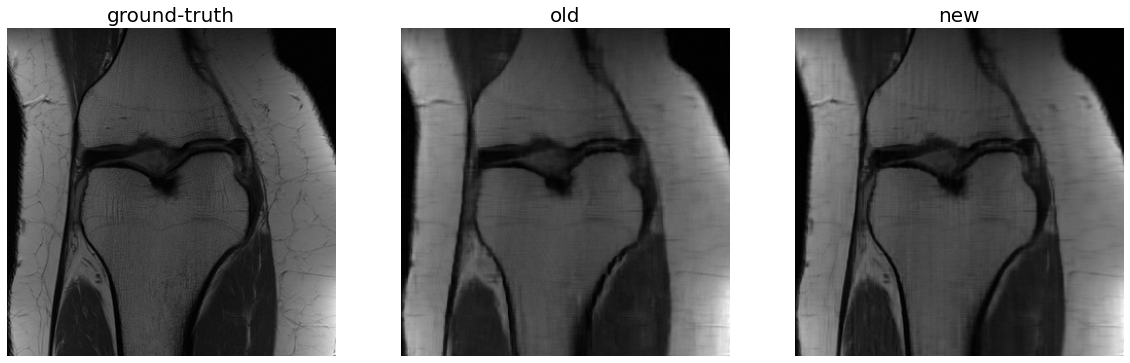

1000464
0.8420059564300316 32.622498328861205
0.8709488812249172 34.6582691779493


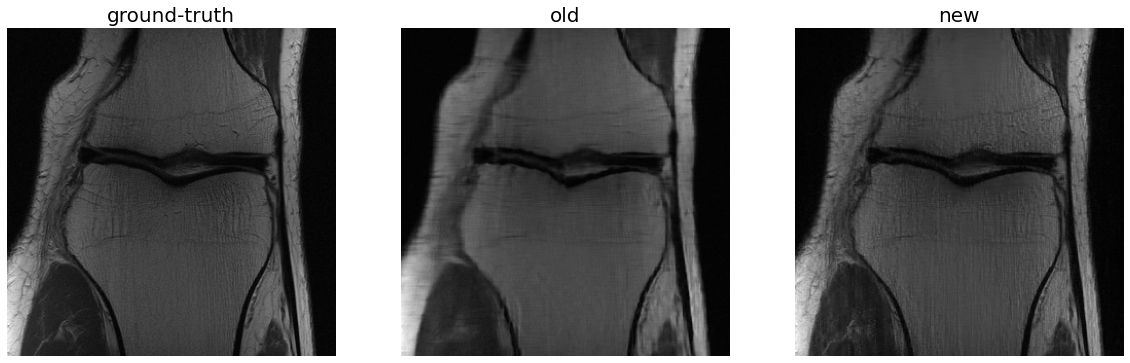

1000537
0.797108998684401 30.98192990388204
0.8246742740956695 32.92192389599956


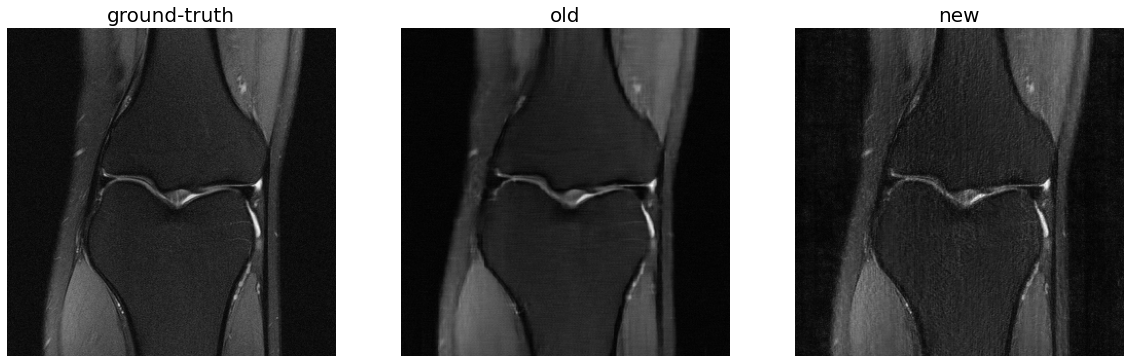

1000818
0.7875588336795045 32.069665854851095
0.6627600498044031 30.215795067284773


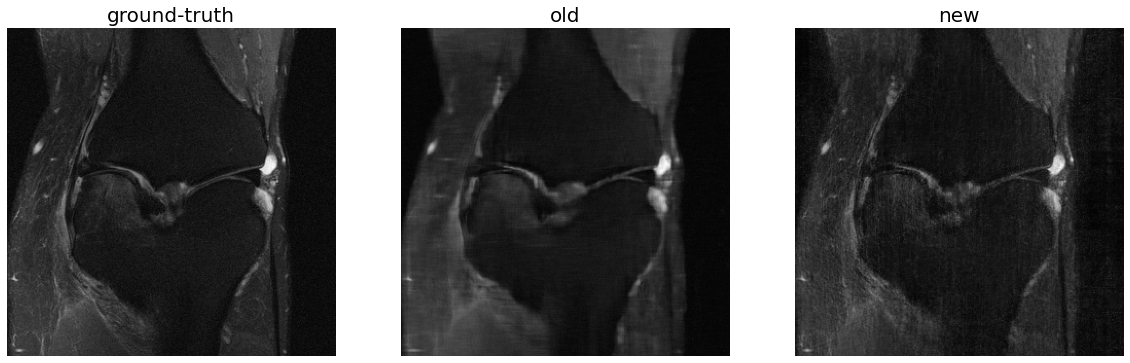

1001140
0.753169265857074 30.993035240057097
0.6565536469932362 29.931067445591637


In [68]:
ssim_n_list, ssim_o_list = [], []
psnr_n_list, psnr_o_list = [], []

for f in files_n_dc[:7]:
    
    vid_key = f.split('_')[0]
    
    arr_n = np.load(path_n + f)
    arr_o = np.load('{}{}_iter10000_alpha0.npy'.format(path_o, vid_key))
    arr_gt = np.load('{}{}_gt.npy'.format(path_n, vid_key))
    
    plot_list([arr_gt, arr_o, arr_n])
    
    _, _, ssim_n, psnr_n = calc_metrics(arr_n, arr_gt)
    _, _, ssim_o, psnr_o = calc_metrics(arr_o, arr_gt)
    ssim_n_list.append(ssim_n), psnr_n_list.append(psnr_n)
    ssim_o_list.append(ssim_o), psnr_o_list.append(psnr_o)
    
    print(vid_key)
    print(ssim_o, psnr_o)
    print(ssim_n, psnr_n)
    
ssim_n_list = np.asarray(ssim_n_list)
ssim_o_list = np.asarray(ssim_o_list)
psnr_n_list = np.asarray(psnr_n_list)
psnr_o_list = np.asarray(psnr_o_list)